<h1><center>Webinar content:</center></h1>

The objective of the webinar is to offer an introduction to the main types of recommender systems and the algorithms behind them. As result, I'm not going to focus on explaining every single line of code rather I'll only be focusing on the parts that are central to understanding the concepts behind recommender systems. I'll also make the notebook public to everyone who has signed up for the webinar so you'll be able to go over my code and test it out for yourself. I also left a lot of comments and notes in the notebook which will hopefully make it easier for you to test the out code for yourself.

The webinar is structured into two main parts. In the first part I'll go over some important concepts behind recommender systems while in the second part I'm going show you how to implement them in Python:

    1.) Recommender systems in theory
        - Types of recommender systems
        - Recommandations as prediction problems
        - Evaluating recommandations
        
    2.) Recommender systems in practice
        - Data-preprocessing
        - Content-based filtering
        - Collaborative filtering
        
My details:
Linkedin: https://www.linkedin.com/in/andpal/
Email: andras.palfi@bigstep.com

_Sidenote: If you are new to Jupyter Notebooks here is good tutorial one to setup a Jupyter Notebook on your PC:     
https://www.dataquest.io/blog/jupyter-notebook-tutorial/_

<h1><center>Recommender Systems</center></h1>

If you've ever found yourself browsing the movie catalogue of Netflix, spending hours to just find something interesting to watch, then you've faced the exact same problem recommender systems are trying to solve: __helping us decide what to buy or consume.__

<img src="netflix.png" style="width: 600px;"/>

Now the big question is why is deciding what to purchase so difficult? First of all, often times we're incapable to convey our own tastes into words. For example, although we know what movies we liked in the past we don't fully understand the factors that made us like those movies. Also, there are times when we don't even know what we need or what we like. As a result, in many cases we're unable to translate our needs into specific products or items to buy or consume. Second of all, these factors are also exacerbated by a phenomenon called choice overload. It turns out, when were're faced with many options, as in the case of Netlix, we find it much harder to make a deicison than when we're faced with only a few.

This is where __recommender systems__ come into play, as they intend to exploit the inefficiencies in our decision making process by providing us with relevant product recommendations. Take for example Amazon's recommender system: 

<img src="amazon_recommender_system_1.png" style="width: 600px;"/>

In [47]:
!pwd

/opt/notebooks/Projects/Tutorials/Recommender_systems


<h1><center>1.) Recommender systems in theory:</center></h1>

## 1.) Types of recommender systems:

Usually, the main purpose of a recommender system is to increase sales or consumption of a product. Of course this can be achieved by providing a user with __relevant__ product recommandations. Relevant meaning products which the user finds both interesting and useful enough to buy or consume. There are two main approaches to building these types of a recommender  systems: __Collaborative Filtering__ and __Content-based Filtering__.

### 1.1.) Collaborative filtering:

> Collaborative filtering algorithms work on a very basic principle: people tend to like products similar to other products they have liked or purchased in the past and also products that people with similar tastes have liked or purchased. As a result, collaborative filtering approaches employ the preferences of users to calculate similarities between users or products, and then use these similarities to make recommendations. For example, if my preferences are similar to that of another costumer it might be a good idea to recommend me products that the other costumer has bought and liked but I haven't. 

### 1.2.) Content-based filtering:

> On the other hand content-based filtering algortihms rely on calculating similarities between products by looking at their attributes. For example, in the case a movie attributes can be considered the movie genre, the director, the cast or even the year the movie was released in. And the way these attributes are used to provide recommendations is somewhat similar collaborative filtering: items that a user has positively rated are collected and other similar items to these examples are recommended for him. For example, if I watched the movie The Departed and gave it five stars it might be a good idea to recommend me movies which belong to the same genre or have the same director or the same cast.  

An important concept both methods employ are user preferences. There are two main methods though which users can express their preferences: __implicit feedback__ or __explicit feedback__. In the case of explicit feedback, users manually provide feedback for the products they have consumed. For example they give a rating for a movie they have watched. On the other hand, implicit feedback is gathered from the interaction users had with specific products. For example, if a user bought a specific item or clicked in a specific product, we can consider that interaction as positive feedback. The first important concept to remember is that when building recommender systems we are always dealing with user-item interaction matrices:

<img src="Recommender-1.jpg"/>

Another important concept is that of similarities. Both content-based methods and collaborative filtering methods measure similarities between users or items to make recommandations. In matematical terms, these similarities can be expressed as measures of similarity or distance between two vectors. As a result, we need to express users or items as vectors:

<img src="Recommender-2.jpg"/>

Two common measures which could help us see how much alike two users or items are would be the Eclidean Distance and Cosine Similarity:

$$ \textbf {Cosine Similarity} = sim(p, q) = cos(\theta{}) = \frac{\textbf{p} \dot{} \textbf{q}}{\| \textbf{p}\| \| \textbf{q}\|} = \sum_{i} \frac{p_{i}q_{i}}{\sqrt{\sum\limits_{i} p_{i}^2} \sqrt{\sum\limits_{i} q_{i}^2} } $$

$$ \textbf {Euclidean Distance} =  dist(p, q) = \sqrt{\sum_{i=1}^n (p_i-q_i)^2} = \sqrt{(p_1-q_1)^2+(p_2-q_2)^2 + ... + (p_i-q_i)^2 } $$

<img src="Recommender-3.jpg"/>

## 2.) Recommandations as prediction problems:

There are two approaches to formulating recommandations as prediction problems: 

> __Rating prediction:__ The first approach is to predict the rating value for a user-item combination. It is assumed that training data is available, indicating user preferences for items. For m users and n items, this corresponds to an incomplete m × n matrix, where the specified (or observed) values are used for training. The missing (or unobserved) values are predicted using this training model. This problem is also referred to as the matrix completion problem because we have an incompletely specified matrix of values, and the remaining values are predicted by the learning algorithm.

> __Top-k ranking:__ In practice, it is not necessary to predict the ratings of users for specific items in order to make recommendations to users. Rather, a merchant may wish to recommend the top-k items for a particular user. This problem is also referred to as the top-k recommendation problem, and it is the ranking formulation of the recommendation problem.

In the second case, the absolute values of the predicted ratings are not important. The first formulation is more general, because the solutions to the second case can be derived by solving the first formulation for various user-item combinations and then ranking the predictions. However, in many cases, it is easier and more natural to design methods for solving the ranking version of the problem directly.

Source: http://www.configworks.com/mz/handout_recsys_sac2010.pdf

## 3.) Evaluating recommender systems:

There are two main environments through which recommender systems can be evaluated: __online__ and __offline__. The best way to measure the quality of a recommendation is to actually see how a user reacts to it. This can be only done when a recommender system is already in production. However, before we can put a system into production we need a method to evaluate it offline. For this, we are going to be using RMSE:

$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big({predicted - actual}{}\Big)^2}} $$

_Sidenote: Evaluating a recommender system is a complex problem. We're only using one metric for simplicity but in real life you would probably use more. Additional resources: https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/EvaluationMetrics.TR_.pdf_

<h1><center> 2.) Recommender systems in practice:</center></h1>

Now that we know the ideas recommender systems are based upon lets see how they can be implemented in practice. In order to do this we're going to download a popular data set ususally used in tutorials. If youre interested in other data sources for recommender systems a great collection of them can be found here: https://cseweb.ucsd.edu/~jmcauley/datasets.html

The data set comes from MovieLens, a movie recommendation service, and it contains 100836 ratings across 9742 movies. The ratings were given by 610 users between 1996 and 2018 with each user providing a minimum of 20 ratings. The data also contains movie attributes like title, genre, and time of publication. Source: https://grouplens.org/datasets/movielens/. If you're using Linux, the data set can be downloaded with the following commands:

In [2]:
%%bash
curl -O http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
unzip ml-latest-small.zip

Archive:  ml-latest-small.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  955k  100  955k    0     0  7894k      0 --:--:-- --:--:-- --:--:-- 7830k
replace ml-latest-small/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [head ml-l]
replace ml-latest-small/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [atest-sma]
replace ml-latest-small/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [ll/rating]
replace ml-latest-small/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [s.csv]
replace ml-latest-small/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


Otherwise, you can download the data set manually using the following link: http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [163]:
!ls ml-latest-small

links.csv  movies.csv  ratings.csv  README.txt	tags.csv


The data set contains 4 .csv files of which we will only use 3:
- __movies.csv__ - Movie names and genres
- __ratings.csv__ - Ratings given by users
- __links.csv__ - Unique links for retrieving IMDB and themoviedb.org data

## Data-preprocessing

In [1]:
import pandas as pd
import numpy as np

# define the path to the data set
path = 'ml-latest-small/'

# Read the data and set 'movieId' as index
ratings = pd.read_csv(path + 'ratings.csv').set_index('movieId')
links = pd.read_csv(path + 'links.csv').set_index('movieId')
movies = pd.read_csv(path + 'movies.csv').set_index('movieId')

# The 3 data sets can be connected using the movieId field:
data = pd.concat([ratings, links, movies], axis = 1, join = 'inner').reset_index()
data.head(10)

,movieId,userId,rating,timestamp,imdbId,tmdbId,title,genres
0,1,1,4.0,964982703,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,3,1,4.0,964981247,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
2,6,1,4.0,964982224,113277,949.0,Heat (1995),Action|Crime|Thriller
3,47,1,5.0,964983815,114369,807.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,50,1,5.0,964982931,114814,629.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,70,1,3.0,964982400,116367,755.0,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
6,101,1,5.0,964980868,115734,13685.0,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
7,110,1,4.0,964982176,112573,197.0,Braveheart (1995),Action|Drama|War
8,151,1,5.0,964984041,114287,11780.0,Rob Roy (1995),Action|Drama|Romance|War
9,157,1,5.0,964984100,109370,1775.0,Canadian Bacon (1995),Comedy|War


In [2]:
# Count the nr. of unique movie and users
n_users = data['userId'].unique().shape[0]
n_items = data['movieId'].unique().shape[0]

print('There are {} unique users and {} unique items'.format(n_users, n_items))
print('Min userId = {}, max userId = {}'.format(data['userId'].min(), data['userId'].max()))
print('Min movieId = {}, max movieId = {}'.format(data['movieId'].min(), data['movieId'].max()))

There are 610 unique users and 9724 unique items
Min userId = 1, max userId = 610
Min movieId = 1, max movieId = 193609


Beacuse _movieId_ is not monotonically increasing, we have to re-map it to go from 1 to 9724 (the number of unique movies). This will be useful later on.

In [3]:
# The movie ID is not monotonically increasing so we need to create a new one
id_old = list(data['movieId'].unique())
id_new = list(range(1, len(id_old)+1))

# Lets save the old id for later in case we need it
id_old_to_new = dict(zip(id_old, id_new))
id_new_to_old = {v: k for k, v in id_old_to_new.items()}

# Add new ID to df
data['movieId'] = list(map(lambda x: id_old_to_new[x], data['movieId']))

# Lets also create an {key = id : value = movie_title} dictionary to able quickly look up movie titles
unique_movies = data.drop_duplicates('movieId', inplace=False)[['title', 'movieId']]
id_to_title = dict(zip(unique_movies['movieId'].values, unique_movies['title'].values))

data.head(10)

,movieId,userId,rating,timestamp,imdbId,tmdbId,title,genres
0,1,1,4.0,964982703,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,1,4.0,964981247,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
2,3,1,4.0,964982224,113277,949.0,Heat (1995),Action|Crime|Thriller
3,4,1,5.0,964983815,114369,807.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,5,1,5.0,964982931,114814,629.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,6,1,3.0,964982400,116367,755.0,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
6,7,1,5.0,964980868,115734,13685.0,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
7,8,1,4.0,964982176,112573,197.0,Braveheart (1995),Action|Drama|War
8,9,1,5.0,964984041,114287,11780.0,Rob Roy (1995),Action|Drama|Romance|War
9,10,1,5.0,964984100,109370,1775.0,Canadian Bacon (1995),Comedy|War


In [4]:
for movie_id, movie in id_to_title.items():
    if 'Space' in movie:
        print(movie_id, movie)

40 Space Jam (1996)
163 Office Space (1999)
199 Spaceballs (1987)
724 2001: A Space Odyssey (1968)
1018 Space Cowboys (2000)
1170 Plan 9 from Outer Space (1959)
1524 Lost in Space (1998)
1642 Muppets From Space (1999)
2924 It Came from Outer Space (1953)
3875 Codependent Lesbian Space Alien Seeks Same (2011)
3911 Space Buddies (2009)
4106 Spacehunter: Adventures in the Forbidden Zone (1983)
4875 SpaceCamp (1986)
5016 Cat from Outer Space, The (1978)
6254 Killer Klowns from Outer Space (1988)
6875 The Forgotten Space (2010)
6950 Space Battleship Yamato (2010)
7754 Morons From Outer Space (1985)
8874 The Space Between Us (2016)
9030 Spaced Invaders (1990)
9060 Space Truckers (1996)
9154 Leprechaun 4: In Space (1997)


In [5]:
id_to_title[724]

'2001: A Space Odyssey (1968)'

It is very important to visualise the data in order to gain a better understanding of it. Here we will only visualise the distibution of the ratings and the distribution of the number of ratings. We can notice that people prefer to use round numbers when giving ratings and also that the majority of the ratings are around 3 and 4 stars. Most movies also have very few ratings or none at all.

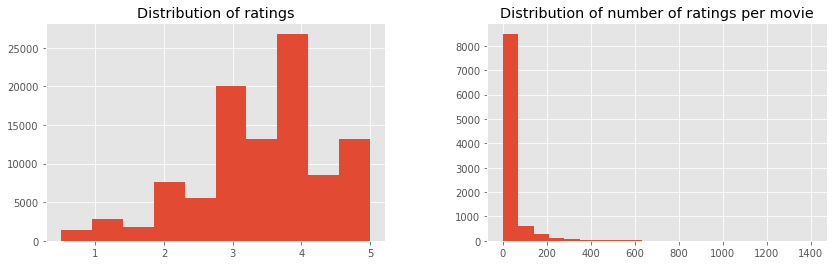

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nr. of ratings per movie
ratings_count = data.groupby('title').sum()['rating'].sort_values(axis=0, ascending=False).reset_index()

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    
    data['rating'].hist(ax = ax[0])
    ax[0].set_title('Distribution of ratings')

    ratings_count.hist(bins=20, ax = ax[1])
    ax[1].set_title('Distribution of number of ratings per movie')
    plt.show()

An important concept in machine learning is __model validation__. It is mainly used to estimate how well a model will perform in practice. This is done by splitting our data into a test set and a train set. The train set is used to train the algorithm while the test set is used estimate the performance of the algorithm in practice. To achieve this, we will randomly remove 10 movies from each user and put those ratings in a separate test set. However, first we create the user-item matrix:

In [8]:
# Given that now we have monotonically increasing IDs we can easily create the user-item matrix:

# Step 1.) Create user-item matrix of zeros
ratings = np.zeros((n_users, n_items))

# Step 2.) Populate matrix with ratings
for row in data.itertuples():
    ratings[row[2]-1, row[1]-1] = row[3]

# Step 3.) Now we have a matrix where each row index is a user and each column index is a movie and cells are ratings 
ratings

array([[4. , 4. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 0. , ..., 0. , 0. , 0. ],
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 5. , ..., 3. , 3.5, 3.5]])

In [9]:
# Set a random seed so results are reproducible
np.random.seed(10)

def train_test_split(ratings, ratings_to_remove = 10):
    """Creates a train and a test set by removing n ratings from each user"""
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        test_ratings = np.random.choice(ratings[user, :].nonzero()[0], size=ratings_to_remove, replace=False)
        train[user, test_ratings] = 0.
        test[user, test_ratings] = ratings[user, test_ratings]
        
    # Verify if test and training are truly disjoint
    assert(np.all((train * test) == 0)) 
    return train, test

train, test = train_test_split(ratings)

Now we have a matrix which we can use to train our algorithm on and a another one to test it on.

# Content-based filtering

Content-based filtering algortihms rely on calculating simialirities between attributes of a given product. In our case we are going to be using the movie genres as our item attributes. The first step in creating our content-based recommender is to calculate all the similarities between movies. However, to achieve this we need to do some data pre-processing first.

In [10]:
# Step 1.) Filter for unique movies
unique_movies = data.drop_duplicates('movieId', inplace=False)[['genres', 'movieId']]

# Step 2.) Lets find all the listed genres and create a {key = movieID : value = genreList} dictionary
genres = {}
genres_generator = map(lambda x: x.split('|'), unique_movies['genres'])
for i, g in enumerate(genres_generator, 1):
    if i==1:
        unique_genres = set(g)
        genres[i] = g
    else:
        unique_genres = unique_genres.union(g)
        genres[i] = g
        
unique_genres = {v: k for k, v in dict(enumerate(unique_genres)).items()}

for i in range(1, 10):
    print('Key = {} : Value = {}'.format(i, genres[i]))

Key = 1 : Value = ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']
Key = 2 : Value = ['Comedy', 'Romance']
Key = 3 : Value = ['Action', 'Crime', 'Thriller']
Key = 4 : Value = ['Mystery', 'Thriller']
Key = 5 : Value = ['Crime', 'Mystery', 'Thriller']
Key = 6 : Value = ['Action', 'Comedy', 'Horror', 'Thriller']
Key = 7 : Value = ['Adventure', 'Comedy', 'Crime', 'Romance']
Key = 8 : Value = ['Action', 'Drama', 'War']
Key = 9 : Value = ['Action', 'Drama', 'Romance', 'War']


We need to transform our dictionary of movie genre lists into a matrix where row indices are movies and column indices are genres:

In [11]:
# Step 3.) One-hot encode genres
genres_matrix = np.zeros((n_items, len(unique_genres)))
for user, genre_list in genres.items():
    genres_matrix[user-1, list(map(lambda x: unique_genres[x], genre_list))] = 1
    
# Step 4.) Now we have a matrix where each row index is a movie id and each column index is genre while cells are 
# either 0 or 1 depending on whether a movie belongs to a specific genre
for i in range(5):
    print('ID = {} '.format(i+1), genres_matrix[i, :])

ID = 1  [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
ID = 2  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
ID = 3  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
ID = 4  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
ID = 5  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]


In [12]:
# Print mapping from column index to genre
for key, value in unique_genres.items():
    print('Column index {} = {}'.format(value+1, key))

Column index 1 = Crime
Column index 2 = Sci-Fi
Column index 3 = Adventure
Column index 4 = Film-Noir
Column index 5 = Musical
Column index 6 = War
Column index 7 = Animation
Column index 8 = Romance
Column index 9 = Drama
Column index 10 = (no genres listed)
Column index 11 = Western
Column index 12 = Documentary
Column index 13 = Comedy
Column index 14 = Action
Column index 15 = Thriller
Column index 16 = Fantasy
Column index 17 = Horror
Column index 18 = Mystery
Column index 19 = IMAX
Column index 20 = Children


Now that we have stored our data in the right data structure we can build a function to calculate the __cosine similarity__ between all movies:

In [13]:
def calculate_content_similarity(genres_matrix, epsilon=1e-9):
    # epsilon is small number for handling dived-by-zero errors
    sim = genres_matrix.dot(genres_matrix.T) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

# Lets calculate content similarities between all movie pairs
movie_similarity_matrix = calculate_content_similarity(genres_matrix)

# We can set very low similarity scores to 0
movie_similarity_matrix[movie_similarity_matrix<0.0001] = 0

# Now we have a matrix where each row index and each column index is a movie id and cells are similarity scores
print(movie_similarity_matrix)

[[1.         0.31622777 0.         ... 0.         0.         0.        ]
 [0.31622777 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.66666667 0.40824829 0.        ]
 ...
 [0.         0.         0.66666667 ... 1.         0.40824829 0.        ]
 [0.         0.         0.40824829 ... 0.40824829 1.         0.70710678]
 [0.         0.         0.         ... 0.         0.70710678 1.        ]]


We can double check if our __calculate_content_similarity__ function is correct by testing a few examples using the __cosine_similarity__ function from __scikit-learn__:

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

movie1 = np.random.randint(1, n_items)
movie2 = np.random.randint(1, n_items)
genre_array1 = genres_matrix[movie1, :].reshape(1,-1)
genre_array2 = genres_matrix[movie2, :].reshape(1,-1)

print('Cosine similarity - sklearn      = {}'.format(float(cosine_similarity(genre_array1, genre_array2))))
print('Cosine similarity - our function = {}'.format(movie_similarity_matrix[movie1, movie2]))

Cosine similarity - sklearn      = 0.0
Cosine similarity - our function = 0.0


Now that we have calculated the similarities between all movie pairs we can start making predictions. For this, we will be using a method called __k-nearest-neighbours__. KNN is a very simple algorithm which calculates the ratings for a specific movie by taking the k most similar movies to it and calculating a weighted average of their ratings:

$$ \textbf {Predicted rating} = \sum_{i=1}^n{\frac{similarity_i * rating_i}{similarity_i}} $$

In [15]:
import heapq

def k_nearest_neighbors(neighbors, k = 40):
    """Predict the rating for a movie using the weighted average rating of the of k-nearest-neighbors"""
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])    
    similarity_total = 0
    weighted_sum = 0    
    for (similarity, rating) in k_neighbors:
        if (similarity > 0):
            similarity_total += similarity
            weighted_sum += similarity * rating
    if similarity_total == 0:
        return 0
    else:
        predicted_rating = weighted_sum / similarity_total
        return predicted_rating

We go through each user in the test set and take each of the 10 movies they have rated and make a prediction rating prediction for each one of them using our __k_nearest_neighbors__:

In [16]:
predicted_ratings = np.zeros(ratings.shape)

# Iterate through each user
for i in range(len(test)):
    userID = i
    test_movies = test[i, :].nonzero()[0]
    train_movies = train[i, :].nonzero()[0]
    
    # Print out progress
    if i%100 == 0:
        print("Processing data for user = {}".format(userID))
    
    # Iterate through each of the movie user i has in the test set and predict a rating for it
    for movie1 in test_movies:
        neighbors = []
        for movie2 in train_movies:
            similarity = movie_similarity_matrix[movie1, movie2]
            rating = train[i, movie2]
            neighbors.append((similarity, rating))
        predicted_ratings[i, movie1] = k_nearest_neighbors(neighbors, k=40)

Processing data for user = 0
Processing data for user = 100
Processing data for user = 200
Processing data for user = 300
Processing data for user = 400
Processing data for user = 500
Processing data for user = 600


In [17]:
predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

As mentioned in the introduction, we can measure the accuracy of our predictions using RMSE:

In [18]:
from math import sqrt
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

print('The mean squared error of our prediction is =  {}'.format(get_mse(predicted_ratings, test)))

The mean squared error of our prediction is =  0.9619787197144143


However prediction accuracy is only part of the answer. We would also like to sample a few recommandations in order to manually check their quality. To do this, we need to build a data set which contains all the movies not yet rated by a user.

In [19]:
# Lets build a data set of all the movies users have not rated yet
no_ratings = [ratings == 0][0]

# Lets pick a random user
# user = np.random.randint(0, n_users)
user = 113

# Get movies user has not yet rated yet
not_rated_movies = no_ratings[user, :].nonzero()[0]

# Get movies user has rated
rated_movies = ratings[user, :].nonzero()[0]

# We will predict ratings for all the movies user has not yet rated
predicted_ratings = {}
for movie1 in not_rated_movies:
    neighbors = []
    for movie2 in rated_movies:
        similarity = movie_similarity_matrix[movie1, movie2]
        rating = ratings[user, movie2]
        neighbors.append((similarity, rating))
    predicted_ratings[movie1] = k_nearest_neighbors(neighbors, k=40)

Now we have predicted ratings for all the movies the user has not seen. However, we're only interested in the top N recommandations (we'll use top 10).

In [20]:
top_n = dict(sorted(predicted_ratings.items(), key=lambda x: x[1], reverse = True)[:10])

print('Watched movies:')
print('-'*50)
for movie in rated_movies:
    print(id_to_title[movie+1])

print('')
print('Recommended movies:')
print('-'*50)
for movie, rating in top_n.items():
    print(id_to_title[movie+1], round(rating,2))

Watched movies:
--------------------------------------------------
Star Wars: Episode IV - A New Hope (1977)
Silence of the Lambs, The (1991)
Monty Python and the Holy Grail (1975)
Star Wars: Episode VI - Return of the Jedi (1983)
Edward Scissorhands (1990)
Green Mile, The (1999)
Wolf of Wall Street, The (2013)
Mad Max: Fury Road (2015)
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
Shrek (2001)
Spider-Man (2002)
Harry Potter and the Chamber of Secrets (2002)
Harry Potter and the Prisoner of Azkaban (2004)
Spider-Man 2 (2004)
Incredibles, The (2004)
Finding Nemo (2003)
Harry Potter and the Half-Blood Prince (2009)
Amazing Spider-Man, The (2012)
WALL·E (2008)
Star Wars: Episode VII - The Force Awakens (2015)
Deadpool (2016)
Zootopia (2016)
Scott Pilgrim vs. the World (2010)
Harry Potter and the Goblet of Fire (2005)
Harry Potter and the Deathly Hallows: Part 1 (2010)
Harry Potter and the Deathly Hallows: Part 2 (2011)
Harry Potter and the 

To make our analysis a little more interesting we can also view the movie posters for the movies in our data set. This can be done by interrogating __themoviedb.org's__ API using the themoivedb id's stored in our data. However, you'll need to apply for a free API key to get acces to the API.

In [21]:
from IPython.display import Image
from IPython.display import display
import requests
import json

# Get base url filepath structure. w185 corresponds to size of movie poster.
headers = {'Accept': 'application/json'}
payload = {'api_key': 'Insert your api key here (should look like this: sdjkhskdjfhsf454)'} 
response = requests.get("http://api.themoviedb.org/3/configuration", params=payload, headers=headers)
response = json.loads(response.text)
base_url = response['images']['base_url'] + 'w185'

def get_poster(movie_id, base_url):    
    # Get themoviedb.org id
    moviedb_id = data[data['movieId'] == movie_id + 1]['tmdbId'].iloc[0]
    
    # Query themoviedb.org API for movie poster path.
    movie_url = 'http://api.themoviedb.org/3/movie/{:}/images'.format(moviedb_id)
    headers = {'Accept': 'application/json'}
    payload = {'api_key': 'cbbcdcb89182cd0208a72504fd7699cd'} 
    response = requests.get(movie_url, params=payload, headers=headers)
    try:
        file_path = json.loads(response.text)['posters'][0]['file_path']
    except:
        # If poster not found return an 'Image not found' picture
        return 'https://tinyurl.com/y7mgd6sv'
        
    return base_url + file_path

In [22]:
watched_movies = tuple(Image(url=get_poster(movie, base_url)) for movie in rated_movies)
display(*watched_movies)

In [23]:
recommended_movies = tuple(Image(url=get_poster(movie, base_url)) for movie in top_n.keys())
display(*recommended_movies)

# Collaborative filtering

Collaborative filtering methods make use of users’ past behaviour in order to recommend items. This approach does not rely on on item or user attributes. There are two main approaches for making recommandations using collaborative filtering:

    1.) Neighborhood-based approach (Memory-based)
    2.) Model-based approach

## 1.) Neighborhood based approach:

Neighbourhood-based collaborative approaches can be divided into two main methods: user-item filtering and item-item filtering. A user-item filtering takes a particular user, finds users that are similar to him or her based similarity of ratings and recommend items that those similar users liked. In contrast, item-item filtering will take an item, find users who liked that item, and find other items that those users or similar users also liked. In both cases, we'll be using the user-item ratings matrix created in the previous section to calculate user-user or item-item similarities.

    1.1.) User-item filtering: “Users who are similar to you also liked …”
    1.2.) Item-item filtering: “Users who liked this item also liked …”

The first step in our neighborhood based approach is to calculate item-item and user-user similarities. This can be achieved using the same approach that we used for calculating content based similarities between movies.

_Sidenote: The python code for this part was taken from Ethan Rosenthal's amazing blog:_
- https://www.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/#Top-$k$-Collaborative-Filtering

In [24]:
def calculate_similarity(ratings, kind='user', epsilon=1e-9):
    # epsilon -> small number for handling dived-by-zero errors
    if kind == 'user':
        sim = ratings.dot(ratings.T) + epsilon
    elif kind == 'item':
        sim = ratings.T.dot(ratings) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [25]:
user_similarity = calculate_similarity(train, kind='user')
item_similarity = calculate_similarity(train, kind='item')

print('User similarity matrix: ', user_similarity.shape)
print('Item similarity matrix: ', item_similarity.shape)

User similarity matrix:  (610, 610)
Item similarity matrix:  (9724, 9724)


In [26]:
for movie_id, movie in id_to_title.items():
    if 'Pulp' in movie:
        print(movie_id, movie)

17 Pulp Fiction (1994)


In [27]:
def get_top_10_similar_movies(movie_id):
    top_10_similar_movies = list(np.argsort(item_similarity[movie_id-1, :])[:-14:-1])
    return top_10_similar_movies

In [28]:
top_10_similar_movies = get_top_10_similar_movies(17)

In [29]:
top_similar = tuple(Image(url=get_poster(movie, base_url)) for movie in top_10_similar_movies)
display(*top_similar)

In [30]:
user_similarity

array([[1.00000000e+00, 1.69827084e-02, 3.67106271e-02, ...,
        2.81830606e-01, 7.51658667e-02, 1.40337501e-01],
       [1.69827084e-02, 1.00000000e+00, 3.37276521e-12, ...,
        2.97378682e-02, 3.32958965e-12, 8.12101617e-02],
       [3.67106271e-02, 3.37276521e-12, 1.00000000e+00, ...,
        1.98995907e-02, 3.55427098e-12, 1.87497972e-02],
       ...,
       [2.81830606e-01, 2.97378682e-02, 1.98995907e-02, ...,
        1.00000000e+00, 1.14127232e-01, 3.21482422e-01],
       [7.51658667e-02, 3.32958965e-12, 3.55427098e-12, ...,
        1.14127232e-01, 1.00000000e+00, 5.31339470e-02],
       [1.40337501e-01, 8.12101617e-02, 1.87497972e-02, ...,
        3.21482422e-01, 5.31339470e-02, 1.00000000e+00]])

In [31]:
item_similarity

array([[1.00000000e+00, 2.57621919e-01, 3.68466890e-01, ...,
        9.19290067e-02, 9.19290067e-02, 9.19290067e-02],
       [2.57621919e-01, 1.00000000e+00, 2.27466331e-01, ...,
        1.44045272e-11, 1.23467376e-11, 1.23467376e-11],
       [3.68466890e-01, 2.27466331e-01, 1.00000000e+00, ...,
        1.28384621e-01, 1.28384621e-01, 1.28384621e-01],
       ...,
       [9.19290067e-02, 1.44045272e-11, 1.28384621e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [9.19290067e-02, 1.23467376e-11, 1.28384621e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [9.19290067e-02, 1.23467376e-11, 1.28384621e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

We can now predict ratings for movies based either on item-item or user-user similarities. Just as in the case of content based filtering, to calculate the rating for a specific movie, we will look at the k-nearest-neighbors (k most similar movies or items) and and calculate a weighted average of their ratings.

In [32]:
def predict_knn(ratings, similarity, kind='user', k=40):
    predicted_ratings = np.zeros(ratings.shape)
    if kind == 'user':
        for i in range(ratings.shape[0]):
            top_k_users = [np.argsort(similarity[:,i])[:-k-1:-1]]
            for j in range(ratings.shape[1]):
                predicted_ratings[i, j] = similarity[i, :][top_k_users].dot(ratings[:, j][top_k_users]) 
                predicted_ratings[i, j] /= np.sum(np.abs(similarity[i, :][top_k_users]))
    if kind == 'item':
        for j in range(ratings.shape[1]):
            top_k_items = [np.argsort(similarity[:,j])[:-k-1:-1]]
            for i in range(ratings.shape[0]):
                predicted_ratings[i, j] = similarity[j, :][top_k_items].dot(ratings[i, :][top_k_items].T) 
                predicted_ratings[i, j] /= np.sum(np.abs(similarity[j, :][top_k_items]))        
    
    return predicted_ratings

In [36]:
item_prediction = predict_knn(train, item_similarity, kind='item')
user_prediction = predict_knn(train, user_similarity, kind='user')

print ('User-based CF RMSE: ' + str(get_mse(user_prediction, test)))
print ('Item-based CF RMSE: ' + str(get_mse(item_prediction, test)))

User-based CF RMSE: 2.893779709736768
Item-based CF RMSE: 3.2278129662921504


Figuring out the right value of k in the k-nearest-neighbors algorithm is another tricky part. One approach we could use is to iterate through several k values and choose the one that minimizes the RMSE.

In [ ]:
k_array = [5, 15, 30, 50, 100, 200]
user_train_mse = []
user_test_mse = []
item_test_mse = []
item_train_mse = []

def get_mse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

for k in k_array:
    user_pred = predict_knn(train, user_similarity, kind='user', k=k)
    item_pred = predict_knn(train, item_similarity, kind='item', k=k)
    
    user_train_mse += [get_mse(user_pred, train)]
    user_test_mse += [get_mse(user_pred, test)]
    
    item_train_mse += [get_mse(item_pred, train)]
    item_test_mse += [get_mse(item_pred, test)]

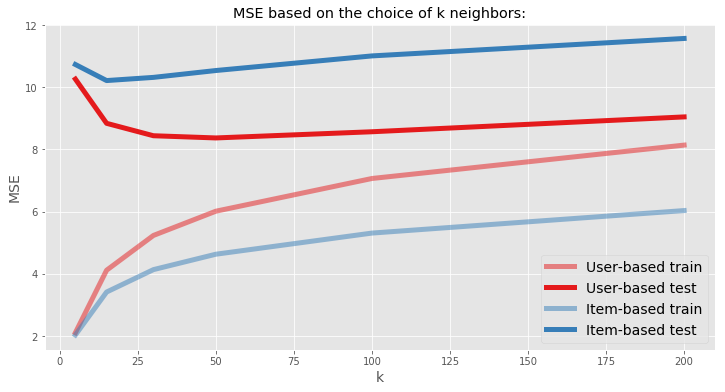

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

with plt.style.context('ggplot'):
    pal = sns.color_palette("Set1", 2)
    plt.figure(figsize=(12, 6))
    plt.plot(k_array, user_train_mse, c=pal[0], label='User-based train', alpha=0.5, linewidth=5)
    plt.plot(k_array, user_test_mse, c=pal[0], label='User-based test', linewidth=5)
    plt.plot(k_array, item_train_mse, c=pal[1], label='Item-based train', alpha=0.5, linewidth=5)
    plt.plot(k_array, item_test_mse, c=pal[1], label='Item-based test', linewidth=5)
    plt.legend(loc='best', fontsize=14)
    plt.title('MSE based on the choice of k neighbors:')
    plt.xlabel('k', fontsize=14);
    plt.ylabel('MSE', fontsize=14);
    plt.show()

In [37]:
print('Watched movies:')
print('-'*50)
for movie in rated_movies:
    print(id_to_title[movie+1])

Watched movies:
--------------------------------------------------
Star Wars: Episode IV - A New Hope (1977)
Silence of the Lambs, The (1991)
Monty Python and the Holy Grail (1975)
Star Wars: Episode VI - Return of the Jedi (1983)
Edward Scissorhands (1990)
Green Mile, The (1999)
Wolf of Wall Street, The (2013)
Mad Max: Fury Road (2015)
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
Shrek (2001)
Spider-Man (2002)
Harry Potter and the Chamber of Secrets (2002)
Harry Potter and the Prisoner of Azkaban (2004)
Spider-Man 2 (2004)
Incredibles, The (2004)
Finding Nemo (2003)
Harry Potter and the Half-Blood Prince (2009)
Amazing Spider-Man, The (2012)
WALL·E (2008)
Star Wars: Episode VII - The Force Awakens (2015)
Deadpool (2016)
Zootopia (2016)
Scott Pilgrim vs. the World (2010)
Harry Potter and the Goblet of Fire (2005)
Harry Potter and the Deathly Hallows: Part 1 (2010)
Harry Potter and the Deathly Hallows: Part 2 (2011)
Harry Potter and the 

Lets sample a the top 10 recommandations for the same user as for content based recommandations.

#### Item similarity based recommandations

In [38]:
top_n_item = np.argsort(item_prediction[user, no_ratings[user, :]])[:-11:-1]

print('Item based based recommandations:')
print('-'*50)
for movie in top_n_item:
    print(id_to_title[movie+1])

Item based based recommandations:
--------------------------------------------------
Birth (2004)
I, Robot (2004)
Kung Fu Hustle (Gong fu) (2004)
He's Just Not That Into You (2009)
Crimson Rivers 2: Angels of the Apocalypse (Rivières pourpres II - Les anges de l'apocalypse, Les) (2004)
Monty Python's The Meaning of Life (1983)
Chicago (2002)
American Pie Presents The Naked Mile (American Pie 5: The Naked Mile) (2006)
Predator 2 (1990)
300 (2007)


In [39]:
recommended_movies = tuple(Image(url=get_poster(movie, base_url)) for movie in top_n_item)
display(*recommended_movies)

#### User similarity based recommandations:

In [40]:
top_n_user = np.argsort(user_prediction[user, no_ratings[user, :]])[:-11:-1]

print('User based recommandations:')
print('-'*50)
for movie in top_n_user:
    print(id_to_title[movie+1])

User based recommandations:
--------------------------------------------------
Ocean's Eleven (2001)
20 Dates (1998)
Enemy at the Gates (2001)
Spirited Away (Sen to Chihiro no kamikakushi) (2001)
300 (2007)
E.T. the Extra-Terrestrial (1982)
Minority Report (2002)
Clear and Present Danger (1994)
Big Trouble in Little China (1986)
Kill Bill: Vol. 2 (2004)


In [41]:
recommended_movies = tuple(Image(url=get_poster(movie, base_url)) for movie in top_n_user)
display(*recommended_movies)

Memory-based algorithms are easy to implement and produce reasonable prediction quality. The drawback of memory-based CF is that it doesn't scale to real-world scenarios and doesn't address the well-known cold-start problem, that is when new user or new item enters the system. Model-based CF methods are scalable and can deal with higher sparsity level than memory-based models.

## 2.) Model based approach

Model-based recommendation systems involve building a model based on the dataset of ratings. In other words, we extract some information from the dataset, and use that as a "model" to make recommendations without having to use the complete dataset every time. This approach potentially offers the benefits of both speed and scalability. I won't be able to go into a lot of detail but one of the methods model based approaches use is matrix factorization. I'll make sure to leave links to a couple of very good reasources that explain how matrix factorization works but for now I'll only show you how to implement SVD using the __surprise__ library.

_Sidenote: A collection of great resources on matrix factorization:_
 - http://nicolas-hug.com/blog/matrix_facto_1
 - https://lazyprogrammer.me/tutorial-on-collaborative-filtering-and-matrix-factorization-in-python/

In [42]:
from surprise import Reader, Dataset

# The Reader class is used to parse a file containing ratings.
reader = Reader(rating_scale=(0.5, 5.0))

# The columns must correspond to user id, item id and ratings (in that order).
sparse_data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

In [43]:
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.'''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [44]:
from collections import defaultdict
from surprise.model_selection import cross_validate
from surprise import SVD

# First train an SVD algorithm on the movielens dataset.
trainset = sparse_data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

In [45]:
# Print the recommended items for each user
print('Model based recommandations:')
print('-'*50)
svd_recommandations = top_n[user]
for movie, rating in svd_recommandations:
    print(id_to_title[movie])

Model based recommandations:
--------------------------------------------------
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)
Young Frankenstein (1974)
Planet of the Apes (1968)
Dark Knight, The (2008)
In the Name of the Father (1993)
Shining, The (1980)
Truman Show, The (1998)
Blade Runner (1982)
Lawrence of Arabia (1962)
Shawshank Redemption, The (1994)


In [46]:
recommanded_movies = tuple(Image(url=get_poster(movie-1, base_url)) for movie, rating in svd_recommandations)
display(*recommanded_movies)

# Sources:

A collection of great resources I have used for putting together this notebook:
    
1.) Ethan Rosenthal's blog:
 - https://www.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/#Top-$k$-Collaborative-Filtering
 
2.) suprise: an easy-to-use Python scikit for recommender systems

- https://surprise.readthedocs.io/en/stable/getting_started.html#getting-started

# System and python details:

In [80]:
%watermark -p pandas,numpy,matplotlib,seaborn,requests,json -m -v

CPython 3.6.6
IPython 6.4.0

pandas 0.23.4
numpy 1.14.5
matplotlib 2.2.2
seaborn 0.9.0
requests 2.19.1
json 2.0.9

compiler   : GCC 7.2.0
system     : Linux
release    : 3.10.0-693.2.2.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 32
interpreter: 64bit
